In [21]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
import pandas as pd

In [2]:
df = pd.read_csv("Resources/cleaned_drug_data.csv")
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,illegal_score_sum,legal_score_sum,illegal_use,legal_use
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,0,1,0,1,0,3,4,1,1
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,3,0,1
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,1,3,1,1
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,3,0,1
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,1,0,0,3,0,1


In [3]:
df.nunique()

ID                   1876
Age                     6
Gender                  2
Education               9
Country                 7
Ethnicity               7
Nscore                 49
Escore                 42
Oscore                 35
AScore                 41
Cscore                 41
Impulsive              10
SS                     11
Alcohol                 2
Amphet                  2
Amyl                    2
Benzos                  2
Caff                    2
Cannabis                2
Choc                    2
Coke                    2
Crack                   2
Ecstasy                 2
Heroin                  2
Ketamine                2
Legalh                  2
LSD                     2
Meth                    2
Mushrooms               2
Nicotine                2
VSA                     2
illegal_score_sum      12
legal_score_sum         6
illegal_use             2
legal_use               2
dtype: int64

In [4]:
df = df.drop(columns= ['VSA', 'Nicotine','Mushrooms','Meth','LSD','Legalh','Ketamine','Heroin','Ecstasy','Crack','Coke','Choc','Cannabis','Caff','illegal_score_sum','legal_score_sum','legal_use','Amyl','Amphet','Alcohol', 'ID','Benzos'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,illegal_use
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1872,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1873,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1874,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [5]:
numerical_data = pd.get_dummies(df)
numerical_data

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,illegal_use,Age_18-24,Age_25-34,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,1,...,0,1,0,0,0,0,0,0,0,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [6]:
X = numerical_data.drop(columns=["illegal_use"])
Y = numerical_data["illegal_use"]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler() model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [10]:
# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.725
k: 3, Train/Test Score: 0.856/0.780
k: 5, Train/Test Score: 0.829/0.787
k: 7, Train/Test Score: 0.821/0.778
k: 9, Train/Test Score: 0.805/0.783
k: 11, Train/Test Score: 0.798/0.780
k: 13, Train/Test Score: 0.791/0.776
k: 15, Train/Test Score: 0.787/0.785
k: 17, Train/Test Score: 0.783/0.780
k: 19, Train/Test Score: 0.779/0.787


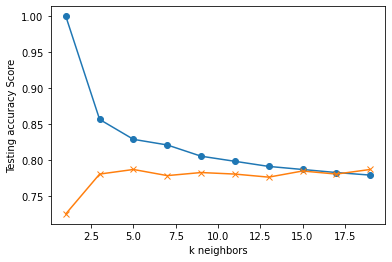

In [17]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    train_score = knn.score(X_train_scaled, Y_train)
    test_score = knn.score(X_test_scaled, Y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, Y_test))

k=5 Test Acc: 0.787


In [25]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=38))

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 234       
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, Y_train, epochs=200)

Epoch 1/200
44/44 [==============================] - 1s 1ms/step - loss: 0.7056 - accuracy: 0.5060
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6070
Epoch 3/200
44/44 [==============================] - 0s 1ms/step - loss: 0.6146 - accuracy: 0.6674
Epoch 4/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.7114
Epoch 5/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.7420
Epoch 6/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.7655
Epoch 7/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.7790
Epoch 8/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5087 - accuracy: 0.7868
Epoch 9/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7939
Epoch 10/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7982
Epoch 11/

Epoch 83/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8337
Epoch 84/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8351
Epoch 85/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8351
Epoch 86/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8344
Epoch 87/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8365
Epoch 88/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.8358
Epoch 89/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8330
Epoch 90/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8358
Epoch 91/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.8380
Epoch 92/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8365


44/44 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8408
Epoch 165/200
44/44 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8436
Epoch 166/200
44/44 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8429
Epoch 167/200
44/44 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8415
Epoch 168/200
44/44 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8429
Epoch 169/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8429
Epoch 170/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8422
Epoch 171/200
44/44 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8408
Epoch 172/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8443
Epoch 173/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8415
Epoc

In [28]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

15/15 - 0s - loss: 0.5072 - accuracy: 0.7846 - 185ms/epoch - 12ms/step
Loss: 0.5071967840194702, Accuracy: 0.7846481800079346
